In [ ]:
!pip install gensim==3.8.1 matplotlib==3.1.0 nltk==3.4.4 numpy==1.16.4 pandas==0.24.2 pomegranate==0.12.0 scikit-image==0.15.0 scikit-learn==0.21.2 scipy==1.3.0 seaborn==0.9.0 torch==1.3.1 torchvision==0.4.2 tqdm==4.32.1 joblib==0.17.0

  Using cached numpy-1.16.4-cp37-cp37m-manylinux1_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.4 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.3.1 which is incompatible.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.32.1 which is incompatible.
pyerfa 2.0.0.1 requires numpy>=1.17, but you have numpy 1.16.4 which is incompatible.
pyarrow 3.0.0 requires numpy>=1.16.6, but you have numpy 1.16.4 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which i

In [ ]:
!pip install numba==0.48.0 --ignore-installed

  Using cached numba-0.48.0-1-cp37-cp37m-manylinux2014_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.31.0-cp37-cp37m-manylinux1_x86_64.whl (20.2 MB)
  Using cached setuptools-60.1.1-py3-none-any.whl (952 kB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.3.1 which is incompatible.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.32.1 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas

In [ ]:
!pip install librosa==0.7.1

In [ ]:
import os
from glob import glob

import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import re
from sklearn import preprocessing
import sys
from pomegranate import *

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
def make_scale_fn(X_train):
    # Standardize on train data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(X_train))
    print("Normalization will be performed using mean: {}".format(scaler.mean_))
    print("Normalization will be performed using std: {}".format(scaler.scale_))
    def scale(X):
        scaled = []

        for frames in X:
            scaled.append(scaler.transform(frames))
        return scaled
    return scale

In [ ]:
def parser(directory,n_mfcc):
    files = glob(os.path.join(directory, "*.wav"))
    print(files)
    fnames = [f.split("/")[-1].split(".")[0].split("_") for f in files]
    ids = [f[2] for f in fnames]
    y = [int(re.search(r'\d+', f[0]).group()) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        wav, _ = librosa.core.load(f, sr=None)

        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Print dataset info
    print("Total wavs: {}. Fs = {} Hz".format(len(wavs), Fs))
    
    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(
            wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=n_mfcc).T
            for wav in tqdm(wavs, desc="Extracting mfcc features...")]

    print("Feature extraction completed with {} mfccs per frame".format(n_mfcc))
    
    # Standardize data
    scaler = preprocessing.StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])
    
    print("Splitting in train test split using the default dataset split")
    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ["0", "1", "2", "3", "4"]

    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git
X_train, X_test, y_train, y_test, spk_train, spk_test = parser(directory="free-spoken-digit-dataset/recordings/",n_mfcc=13)
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,stratify=y_train,test_size=0.20)

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4234, done.
remote: Counting objects: 100% (562/562), done.
remote: Compressing objects: 100% (550/550), done.
remote: Total 4234 (delta 31), reused 524 (delta 12), pack-reused 3672
Receiving objects: 100% (4234/4234), 30.45 MiB | 23.13 MiB/s, done.
Resolving deltas: 100% (108/108), done.
['free-spoken-digit-dataset/recordings/0_lucas_34.wav', 'free-spoken-digit-dataset/recordings/9_nicolas_36.wav', 'free-spoken-digit-dataset/recordings/0_jackson_43.wav', 'free-spoken-digit-dataset/recordings/8_george_33.wav', 'free-spoken-digit-dataset/recordings/4_jackson_0.wav', 'free-spoken-digit-dataset/recordings/1_theo_41.wav', 'free-spoken-digit-dataset/recordings/2_lucas_32.wav', 'free-spoken-digit-dataset/recordings/3_yweweler_44.wav', 'free-spoken-digit-dataset/recordings/5_theo_11.wav', 'free-spoken-digit-dataset/recordings/0_george_17.wav', 'free-spoken-digit-dataset/recordings/6_theo_31.wav', 'free-spoken-digit-datas

Extracting mfcc features...:   1%|          | 25/3000 [00:00<00:11, 248.21it/s]

Total wavs: 3000. Fs = 8000 Hz


Extracting mfcc features...: 100%|██████████| 3000/3000 [00:26<00:00, 113.93it/s]


Feature extraction completed with 13 mfccs per frame
Splitting in train test split using the default dataset split


/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note

In [ ]:
print('lets take a look into the train and the test set')
print('the length of the train set is:',len(X_train))
print('the length of the test set is:',len(X_test))
print('the shape of the feature_array for the first wav file is:',X_train[0].shape)
print('the feature_array for the first wav file is:',X_train[0][:5])

lets take a look into the train and the test set
the length of the train set is: 2700
the length of the test set is: 300
the shape of the feature_array for the first wav file is: (44, 13)
the feature_array for the first wav file is: [[-0.44175017 -3.1606588   0.15431444  1.0152982  -0.43095726  1.2294226
  -0.523808    2.0038197  -0.61440116  0.64472723 -0.6027715   1.3812845
   0.38106018]
 [-0.7590125  -2.827432    0.46134356  1.1109686   0.19795308  1.7012955
  -0.3427637   2.103306   -0.23468001  1.2745342  -0.39175054  0.88707864
  -0.04341581]
 [-1.3139998  -1.2492635  -0.08355827 -0.09560532  0.18403004  1.220369
  -0.3065677   1.2500912  -0.23079728  0.7390443   1.6344454   0.9292701
  -0.38656047]
 [-0.4727013  -0.7012266  -0.40429202  0.30962136  0.4098145   0.96458966
  -0.05485974  0.8226754   0.55830073  0.8288073   0.6587547   0.10060805
  -0.21596901]
 [-0.515158   -1.5047289  -0.6789595   0.38771987  0.24995393  0.9599639
   0.0265132   0.97391677 -0.7468353  -0.0641540

In [ ]:
s=0
for i in range(len(X_tr)):
    s=s+X_tr[i].shape[0]
print('the number of 13-group features in the training_set:',s)
k=0
for i in range(len(X_val)):
    k=k+X_val[i].shape[0]
print('the number of 13-group features in the validation_set:',k)

the number of 13-group features in the training_set: 64291
the number of 13-group features in the validation_set: 15929


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
class HMM(BaseEstimator, ClassifierMixin):
    # Hidden Markov Model using Gaussian Mixtures Model
    # Labels are supposed to be in range[0, len(n_labels)]
    def __init__(self):
        self.hmm=[]
        
    def fit(self, X_train,y_train,n_states,n_mixtures,max_iterations):
        digits_train_3d=[]
        digits_train_2d=[]
        for i in range(10):
            help_array=[]
            for j in range(len(X_train)):
                if y_train[j]==i :
                   X_help=X_train[j].real
                   X=X_help.astype('float64')
                   help_array.append(X)
            digits_train_3d.append(help_array)
            digits_train_2d.append(np.vstack(help_array))   

        for i in range(10):
            # for each digit 0-9

            X = digits_train_2d[i] # data from a single digit (can be a numpy array)

            gmm = True # whether to use GMM or plain Gaussian
            dists = [] # list of probability distributions for the HMM states
            for j in range(n_states):
                if gmm:
                    a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_mixtures, X)
                else:
                    a = MultivariateGaussianDistribution.from_samples(X)
                dists.append(a)

            # Transition probabilities
            trans_mat = np.diag(np.ones(n_states), k=0)*0.5 + np.diag(np.ones(n_states-1), k=1)*.5  # transition matrix
            trans_mat[-1,-1] = 1 #last state

            starts = [1] + ((n_states-1)*[0]) # starting probability matrix
            ends = starts[::-1] # ending probability matrix

            # Define the GMM-HMM
            self.hmm.append(HiddenMarkovModel.from_matrix(transition_probabilities=trans_mat, distributions=dists, 
                                                     starts=starts, ends=ends, 
                                                     state_names=['s{}'.format(i) for i in range(n_states)]))
        print(len(self.hmm))  

        for i in range(10):
            # Fit the model
            self.hmm[i].fit(digits_train_3d[i], max_iterations=max_iterations, algorithm='baum-welch')
        
        return self
    
        
    def predict(self, X_test):
        self.y_pred = []
        for sample in X_test:
            predictions=[]
            for i in range(len(self.hmm)):
                # Run viterbi algorithm and return log-probability
                logp,_= self.hmm[i].viterbi(sample) 
                predictions.append(logp)
            # Store the index of the maximum log-probability
            self.y_pred.append(np.argmax(predictions))
        return self.y_pred
    def score(self,X_test,y_test):
        self.predict(X_test)
        y_test=np.asarray(y_test)
        cm=confusion_matrix(y_test,self.y_pred)
        classes=np.unique(y_test)
        plot_confusion_matrix(cm,classes)
        plt.show()
        print(classification_report(y_test,self.y_pred))
        print(accuracy_score(y_test,self.y_pred))

        return np.sum(self.y_pred == y_test) / y_test.shape[0]

10
CPU times: user 52 s, sys: 29.6 s, total: 1min 21s
Wall time: 46.7 s
Confusion matrix, without normalization
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 1  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  1  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 30]]


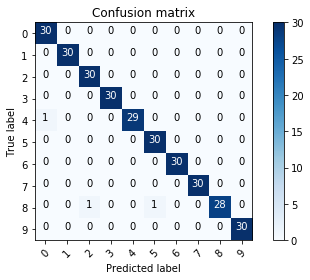

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       1.00      0.93      0.97        30
           9       1.00      1.00      1.00        30

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

0.99
0.99
CPU times: user 1.47 s, sys: 162 ms, total: 1.63 s
Wall time: 1.48 s


In [ ]:
model=HMM()
%time model.fit(X_tr,y_tr,4,4,5)
%time print(model.score(X_test,y_test))


0
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 1 53  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 2  0  0 52  0  0  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  4  0]
 [ 0  0  0  1  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


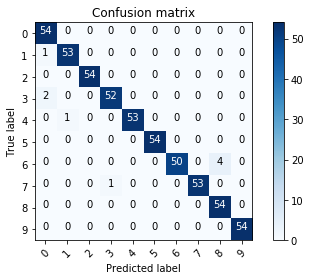

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.98      0.98      0.98        54
           2       1.00      1.00      1.00        54
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        54
           6       1.00      0.93      0.96        54
           7       1.00      0.98      0.99        54
           8       0.93      1.00      0.96        54
           9       1.00      1.00      1.00        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

0.9833333333333333
1
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 3  0  1 50  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  

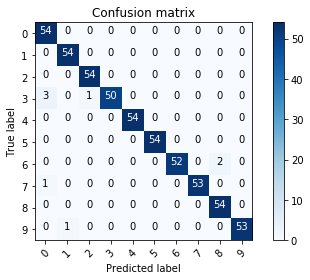

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.98      1.00      0.99        54
           2       0.98      1.00      0.99        54
           3       1.00      0.93      0.96        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.96      0.98        54
           7       1.00      0.98      0.99        54
           8       0.96      1.00      0.98        54
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9851851851851852
2
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 1 53  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  0  0  3  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  

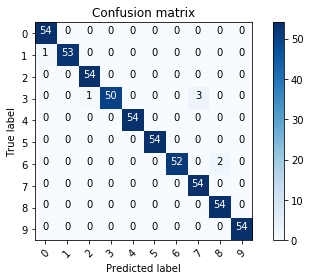

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.98      0.99        54
           2       0.98      1.00      0.99        54
           3       1.00      0.93      0.96        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.96      0.98        54
           7       0.95      1.00      0.97        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.987037037037037
3
10
Confusion matrix, without normalization
[[53  0  0  0  0  0  0  1  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  3  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0

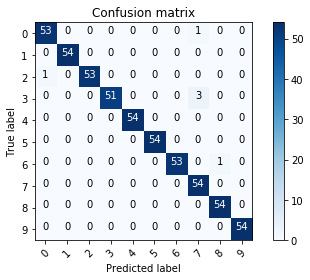

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       1.00      1.00      1.00        54
           2       1.00      0.98      0.99        54
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       0.93      1.00      0.96        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9888888888888889
4
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  3  0  0  0  0]
 [ 1  0 53  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  0  1  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  

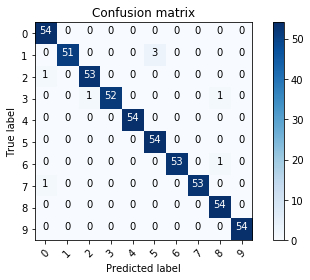

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        54
           2       0.98      0.98      0.98        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       0.95      1.00      0.97        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9851851851851852
5
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  3 51  0  0  0  0  0  0]
 [ 1  1  0  0 52  0  0  0  0  0]
 [ 0  0  0  

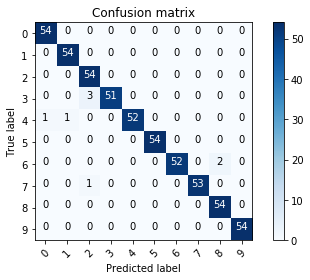

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.98      1.00      0.99        54
           2       0.93      1.00      0.96        54
           3       1.00      0.94      0.97        54
           4       1.00      0.96      0.98        54
           5       1.00      1.00      1.00        54
           6       1.00      0.96      0.98        54
           7       1.00      0.98      0.99        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9851851851851852
6
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 1 52  0  0  0  1  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 2  0  0 52  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  1  0  

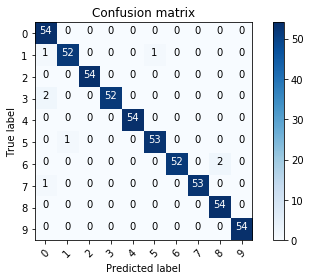

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.98      0.96      0.97        54
           2       1.00      1.00      1.00        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       0.98      0.98      0.98        54
           6       1.00      0.96      0.98        54
           7       1.00      0.98      0.99        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9851851851851852
7
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 3  0  2 49  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  

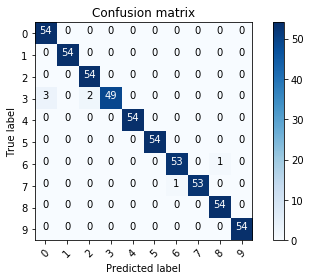

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      1.00      1.00        54
           2       0.96      1.00      0.98        54
           3       1.00      0.91      0.95        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       0.98      0.98      0.98        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.987037037037037
8
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  1  0  1  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  2 52  0  0  0  0  0  0]
 [ 1  1  0  0 52  0  0  0  0  0]
 [ 0  1  0  0

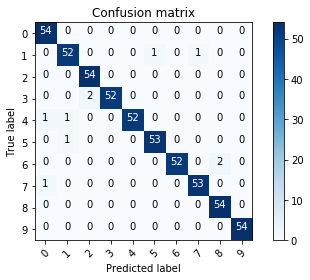

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.96      0.96      0.96        54
           2       0.96      1.00      0.98        54
           3       1.00      0.96      0.98        54
           4       1.00      0.96      0.98        54
           5       0.98      0.98      0.98        54
           6       1.00      0.96      0.98        54
           7       0.98      0.98      0.98        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

0.9814814814814815
9
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  1  0  1  0  0]
 [ 1  0 53  0  0  0  0  0  0  0]
 [ 1  0  2 51  0  0  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  0  0  

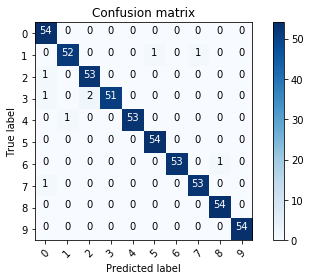

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.98      0.96      0.97        54
           2       0.96      0.98      0.97        54
           3       1.00      0.94      0.97        54
           4       1.00      0.98      0.99        54
           5       0.98      1.00      0.99        54
           6       1.00      0.98      0.99        54
           7       0.98      0.98      0.98        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

0.9833333333333333
10
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  1  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  0  0 

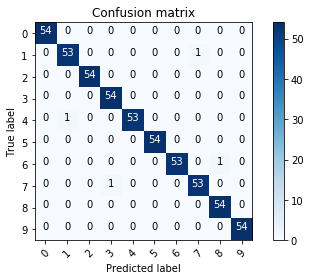

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.98      0.98        54
           2       1.00      1.00      1.00        54
           3       0.98      1.00      0.99        54
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       0.98      0.98      0.98        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
11
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  1  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  2 51  0  0  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  1  0 

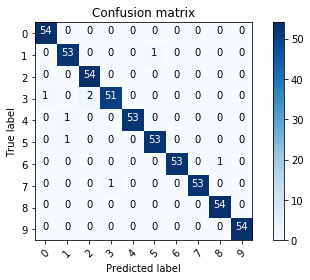

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.96      0.98      0.97        54
           2       0.96      1.00      0.98        54
           3       0.98      0.94      0.96        54
           4       1.00      0.98      0.99        54
           5       0.98      0.98      0.98        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9851851851851852
12
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  2  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

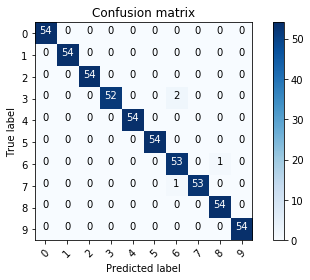

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       0.95      0.98      0.96        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
13
10
Confusion matrix, without normalization
[[53  1  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  0  0  2  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  0  0 

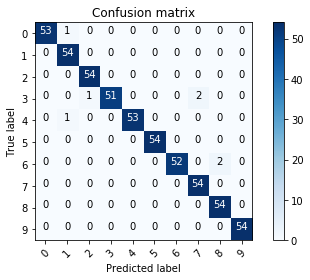

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        54
           2       0.98      1.00      0.99        54
           3       1.00      0.94      0.97        54
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        54
           6       1.00      0.96      0.98        54
           7       0.96      1.00      0.98        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.987037037037037
14
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  0 53  0  0  0  0  0  0  0]
 [ 0  0  2 52  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  

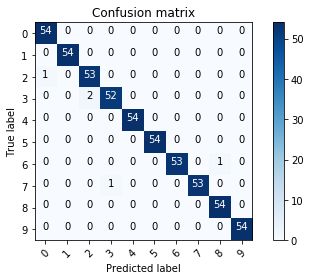

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      1.00      1.00        54
           2       0.96      0.98      0.97        54
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
15
10
Confusion matrix, without normalization
[[51  3  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  2 51  0  0  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  1  0 

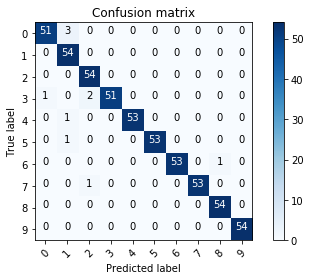

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.92      1.00      0.96        54
           2       0.95      1.00      0.97        54
           3       1.00      0.94      0.97        54
           4       1.00      0.98      0.99        54
           5       1.00      0.98      0.99        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

0.9814814814814815
16
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  1  0 

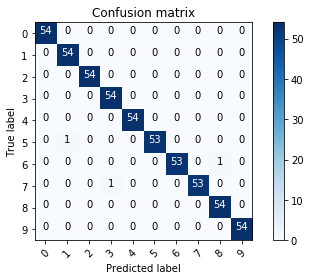

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        54
           3       0.98      1.00      0.99        54
           4       1.00      1.00      1.00        54
           5       1.00      0.98      0.99        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9944444444444445
17
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  0 53  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

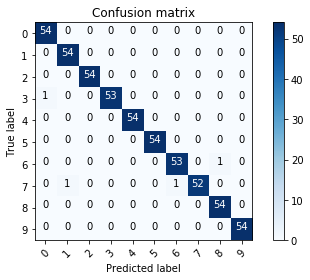

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        54
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       0.98      0.98      0.98        54
           7       1.00      0.96      0.98        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
18
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  0 53  0  0  0  0  0  0  0]
 [ 0  2  0 52  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

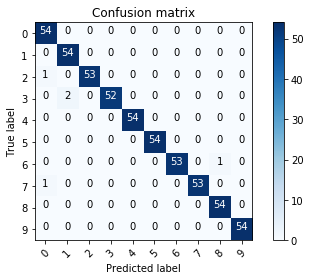

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.96      1.00      0.98        54
           2       1.00      0.98      0.99        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
19
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

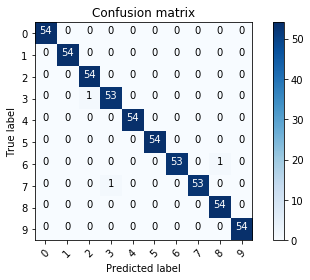

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9944444444444445
20
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

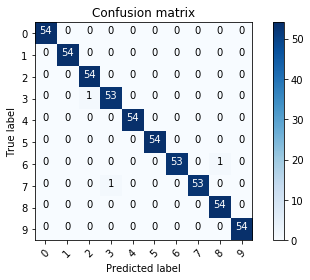

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9944444444444445
21
10


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  1 52  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 1  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


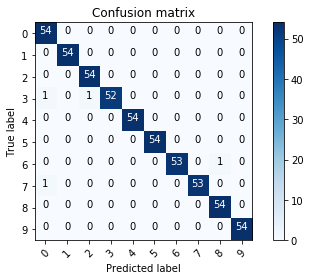

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
22
10


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  1  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 1  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


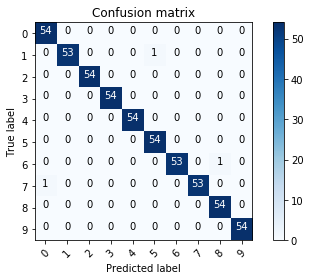

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.98      0.99        54
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        54
           5       0.98      1.00      0.99        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9944444444444445
23
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

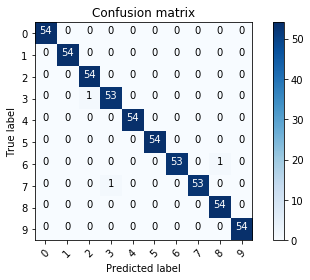

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9944444444444445
24
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 2  0  0 51  0  0  0  1  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

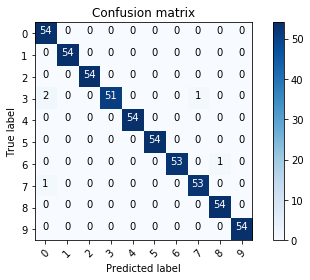

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        54
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       0.98      0.98      0.98        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
25
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  0 51  0  0  0  2  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

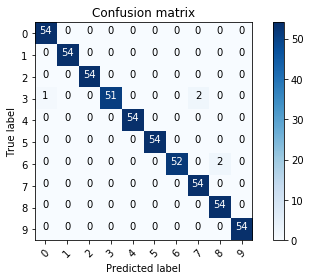

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        54
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.96      0.98        54
           7       0.96      1.00      0.98        54
           8       0.96      1.00      0.98        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
26
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 53  1  0  0  0  0  0  0]
 [ 1  0  0 53  0  0  0  0  0  0]
 [ 1  0  0  0 53  0  0  0  0  0]
 [ 0  0  0 

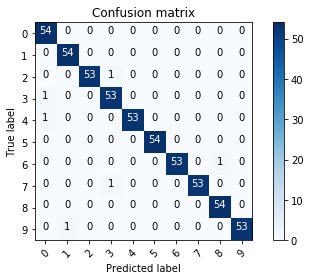

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.98      1.00      0.99        54
           2       1.00      0.98      0.99        54
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9888888888888889
27
10
Confusion matrix, without normalization
[[53  1  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 52  2  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

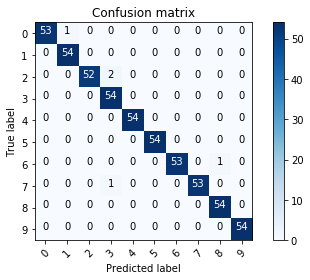

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        54
           2       1.00      0.96      0.98        54
           3       0.95      1.00      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
28
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

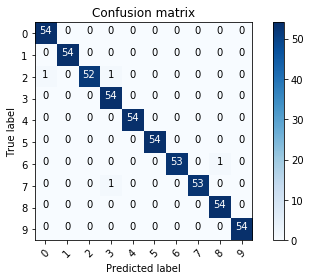

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      1.00      1.00        54
           2       1.00      0.96      0.98        54
           3       0.96      1.00      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
29
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  1  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  1  0 

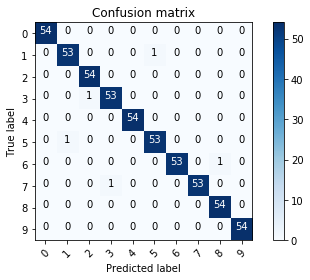

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.98      0.98        54
           2       0.98      1.00      0.99        54
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        54
           5       0.98      0.98      0.98        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
30
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  2 51  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

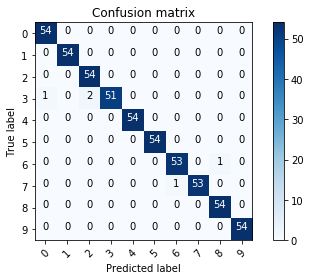

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      1.00      1.00        54
           2       0.96      1.00      0.98        54
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       0.98      0.98      0.98        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
31
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

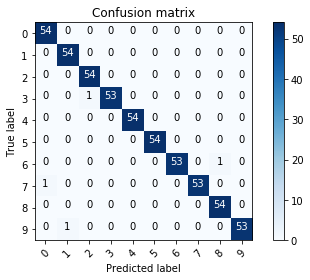

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.98      1.00      0.99        54
           2       0.98      1.00      0.99        54
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
32
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  1 52  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

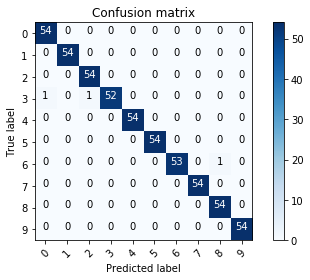

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      1.00      1.00        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9944444444444445
33
10


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  1 52  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 0  0  0  0  0  0  1 53  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


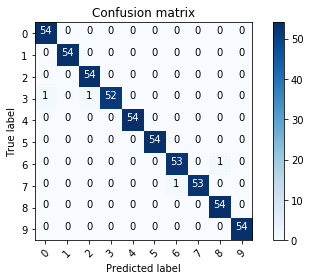

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       0.98      0.98      0.98        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926
34
10


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 1  0  2 51  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 1  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


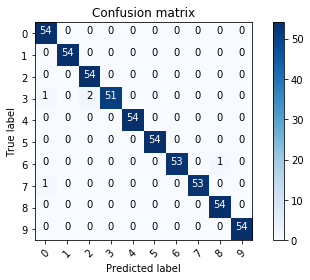

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      1.00      1.00        54
           2       0.96      1.00      0.98        54
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9907407407407407
35
10
Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0 

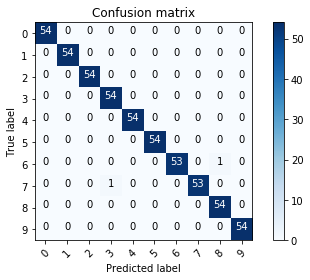

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        54
           3       0.98      1.00      0.99        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       1.00      0.98      0.99        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

0.9962962962962963


In [ ]:
n_states= list(range(2,5))
n_mixtures= list(range(2,6))
max_iterations=[5,15,30]
all_scores=[]
i=0
for st_ in n_states:
    for mix_ in n_mixtures:
        for max_iter in max_iterations: 
            print(i)
            i+=1
            clf=HMM()
            clf.fit(X_tr, y_tr, st_, mix_,max_iter)
            all_scores.append(clf.score(X_val,y_val))


10


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Confusion matrix, without normalization
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  1  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 0  0  0  1  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


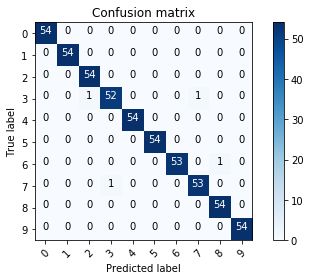

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        54
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      0.98      0.99        54
           7       0.98      0.98      0.98        54
           8       0.98      1.00      0.99        54
           9       1.00      1.00      1.00        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

0.9925925925925926


0.9925925925925926

In [ ]:
clf=HMM()
clf.fit(X_tr, y_tr, 4, 5,30)
clf.score(X_val,y_val)


10


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Confusion matrix, without normalization
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  1  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0 30]]


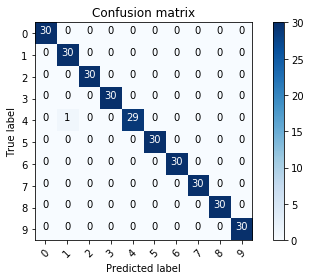

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

0.9966666666666667


0.9966666666666667

In [ ]:
clf=HMM()
clf.fit(X_train, y_train, 4, 5,15)
clf.score(X_test,y_test)

**ΒΗΜΑ 14**

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn


class FrameLevelDataset(Dataset):
    def __init__(self, feats, labels):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        lengths =[]
        for i in range(len(feats)):
          for j in range(len(feats[i])):
            lengths.append(len(feats[i][j]))

        self.labels =labels
        self.lengths = np.array(lengths)
        self.feats = self.zero_pad_and_stack(feats)
        
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        padded = []
        #print(x[0][0].copy())
        #for i in range(len(x)):
        labels = np.concatenate((self.labels, i*np.ones(len(x))),axis=0)
        for j in range(len(x)):
                #zero padding
                padded.append(np.concatenate((x[j].copy(), np.zeros((153-len(x[j]),13)) ), axis=0) )

        padded = np.array(padded)

        return padded

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)


class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.rnnsize = rnn_size
        self.nl = num_layers
        self.lstm = nn.LSTM(input_dim, rnn_size, num_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(self.feature_size, output_dim)  

        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers


    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index
            lengths: N x 1
         """
        isbidirectional = 1
        x = x.float()
        # --------------- Insert your code here ---------------- #
        if self.bidirectional:
          isbidirectional = 2  
        h0 = torch.zeros(self.nl*isbidirectional, x.size(0), self.rnnsize).to(device) 
        c0 = torch.zeros(self.nl*isbidirectional, x.size(0), self.rnnsize).to(device)
        outputs, _ = self.lstm(x, (h0, c0)) 
     
        outputs = self.fc(outputs[:, :, :])
        last_outputs = self.last_timestep(outputs, lengths, bidirectional=self.bidirectional)

        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network

        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [ ]:
bidirectional = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BasicLSTM(13, 50, 10, 2, bidirectional=bidirectional).to(device)
model = model.float()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
datatrain = [[],[],[],[],[],[],[],[],[],[]]

for i in range(len(X_train)):
    datatrain[y_train[i]].append(np.array(X_train[i]))

dataval = [[], [], [], [],  [], [], [], [], [], []]

for i in range(len(X_val)):
    dataval[y_val[i]].append(np.array(X_val[i]))
    
    
datatest = [[], [], [], [], [], [], [], [], [], []]

for i in range(len(X_test)):
    datatest[y_test[i]].append(np.array(X_test[i]))

In [ ]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
trainloader = torch.utils.data.DataLoader(FrameLevelDataset(X_train,y_train), batch_size=20,
                                          shuffle=True)
ts = len(trainloader)
testloader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(X_test,y_test),
                                          batch_size=20, 
                                          shuffle=False)
for epoch in range(5):  # loop over the dataset multiple times 

    running_loss = 0.0
    
    for i, (feats,labels,lengths) in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        feats1 = feats.reshape(-1, 153, 13).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device) 
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(feats1, lengths)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i) % 8 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, 5, i+1, ts, loss.item()))
        with torch.no_grad():
          correct = 0
          total = 0
          for feats, labels, lengths in testloader:
              feats = feats.reshape(-1, 153, 13).to(device)
              labels = labels.to(device)
              labels = torch.tensor(labels, dtype=torch.long, device=device)
              lengths = lengths.to(device)
              outputs = model(feats, lengths).double()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

    print('Validation Accuracy = {} %'.format(100 * correct / total)) 
print('Finished Training')

In [ ]:
class FrameLevelDataset(Dataset):
    def __init__(self, feats, labels):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        lengths =[]
        for i in range(len(feats)):
          for j in range(len(feats[i])):
            lengths.append(len(feats[i][j]))

        self.labels =labels
        self.lengths = np.array(lengths)
        self.feats = self.zero_pad_and_stack(feats)
       
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        padded = []
        #print(x[0][0].copy())
        #for i in range(len(x)):
        labels = np.concatenate((self.labels, i*np.ones(len(x))),axis=0)
        for j in range(len(x)):
                #zero padding
                padded.append(np.concatenate((x[j].copy(), np.zeros((153-len(x[j]),13)) ), axis=0) )

        padded = np.array(padded)

        return padded

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)


class BasicLSTM(nn.Module):
    nn.Dropout(0.2)
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.rnnsize = rnn_size
        self.nl = num_layers
        self.lstm = nn.LSTM(input_dim, rnn_size, num_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(self.feature_size, output_dim)  

        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers


    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index
            lengths: N x 1
         """
        isbidirectional = 1
        x = x.float()
        # --------------- Insert your code here ---------------- #
        if self.bidirectional:
          isbidirectional = 2  
        h0 = torch.zeros(self.nl*isbidirectional, x.size(0), self.rnnsize).to(device) 
        c0 = torch.zeros(self.nl*isbidirectional, x.size(0), self.rnnsize).to(device)
        outputs, _ = self.lstm(x, (h0, c0)) 
     
        outputs = self.fc(outputs[:, :, :])
        last_outputs = self.last_timestep(outputs, lengths, bidirectional=self.bidirectional)

        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network

        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [ ]:
bidirectional = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BasicLSTM(13, 50, 10, 2, bidirectional=bidirectional).to(device)
model = model.float()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),  weight_decay=1e-5)

In [ ]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
trainloader = torch.utils.data.DataLoader(FrameLevelDataset(X_train,y_train), batch_size=20,
                                          shuffle=True)
ts = len(trainloader)
testloader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(X_test,y_test),
                                          batch_size=20, 
                                          shuffle=False)
print(type(testloader))
for epoch in range(5):  # loop over the dataset multiple times 

    running_loss = 0.0
    
    for i, (feats,labels,lengths) in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        feats1 = feats.reshape(-1, 153, 13).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device) 
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(feats1, lengths)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i) % 8 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, 5, i+1, ts, loss.item()))
        with torch.no_grad():
          correct = 0
          total = 0
          for feats, labels, lengths in testloader:
              feats = feats.reshape(-1, 153, 13).to(device)
              labels = labels.to(device)
              labels = torch.tensor(labels, dtype=torch.long, device=device)
              lengths = lengths.to(device)
              outputs = model(feats, lengths).double()
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

    print('Validation Accuracy = {} %'.format(100 * correct / total)) 
print('Finished Training')

In [ ]:
train_loss=[]
val_loss=[]
min_val_loss = np.Inf
n_epochs_stop = 20
epochs_no_improve = 0
total_step = len(trainloader)

for epoch in range(5):
    train_loss.append([])
    val_loss.append([])
    early_stop = False
    
    for i, (feats, labels, lengths) in enumerate(testloader):
        feats1 = feats.reshape(-1, 153, 13).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device) 
        
        # Forward pass
        outputs = model(feats, lengths).double()
        loss = criterion(outputs, labels)
        
        val_loss[epoch].append(loss.item())
    
    
    
    v_loss = 0
    for i, (feats, labels, lengths) in enumerate(trainloader):
        feats_reshape = feats.reshape(-1, 153, 13).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        
        # Forward pass
        outputs = model(feats_reshape, lengths)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 4 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, 5, i+1, total_step, loss.item()))
        train_loss[epoch].append(loss.item())
        
        v_loss += loss
        v_loss = v_loss / len(trainloader)
        # If the validation loss is at a minimum
        if v_loss < min_val_loss:
  
             #torch.save(model)
             epochs_no_improve = 0
             min_val_loss = v_loss
  
        else:
            epochs_no_improve += 1
        # Check early stopping condition           
        if epochs_no_improve == 20:
            print('Early stopping!' )
            early_stop = True
            break
        else:
            continue
        break
    if early_stop:
        print("Stopped")
        break